# Car Evaluation
- Attributes: 
    - buying:   vhigh, high, med, low.
    - maint:    vhigh, high, med, low.
    - doors:    2, 3, 4, 5more.
    - persons:  2, 4, more.
    - lug_boot: small, med, big.
    - safety:   low, med, high.

- Class
    - unacc, acc, good, vgo, od

### Importing Packages

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### Loading Dataset

In [86]:
df = pd.read_csv('car.data')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Assigning columns


In [87]:
df_columns = ['buying','maint','doors','persons','lug_boot','safety','class'] 
df.columns = df_columns
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## Exploratory data analysis

### Information about all Attributes
- Each attribute has dtype as object, with instance length of 1727. Having no NaN values inside them, and first 5 attributes will be considered for Features, and reamaining one will be considered as Label for our Machine learning model.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Describing all Attributes
- Below table shows the unique values inside them along with top most category and frequncy.

In [89]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


### Checking for NaN values in Dataset
- All attributes have 0 NaN values.

In [90]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Checking for N-Unique values

In [91]:
df.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

### Checking for value counts

In [92]:
df.value_counts()

buying  maint  doors  persons  lug_boot  safety  class
high    high   2      2        big       high    unacc    1
med     med    4      more     small     med     acc      1
                                         high    acc      1
                               med       med     acc      1
                                         low     unacc    1
                                                         ..
low     low    3      2        med       med     unacc    1
                                         low     unacc    1
                                         high    unacc    1
                               big       med     unacc    1
vhigh   vhigh  5more  more     small     med     unacc    1
Length: 1727, dtype: int64

### Splitting into Features and label

In [93]:
df_features = df.drop('class',axis=1)
df_label = df[['class']]
print(df_features.shape,df_label.shape)
print(df_label.value_counts())

(1727, 6) (1727, 1)
class
unacc    1209
acc       384
good       69
vgood      65
dtype: int64


## Data Preprocessing

### Performing Encoding on Dataset

In [94]:
ordinal_encoder = OrdinalEncoder()
df_features_encoded = ordinal_encoder.fit_transform(df_features)
df_label_encoded = ordinal_encoder.fit_transform(df_label)
print(df_features_encoded.shape,df_label_encoded.shape)
df_features_encoded = pd.DataFrame(df_features_encoded,columns=df_features.columns)
df_label_encoded = pd.DataFrame(df_label_encoded,columns=df_label.columns)

(1727, 6) (1727, 1)


### Checking for Correlation

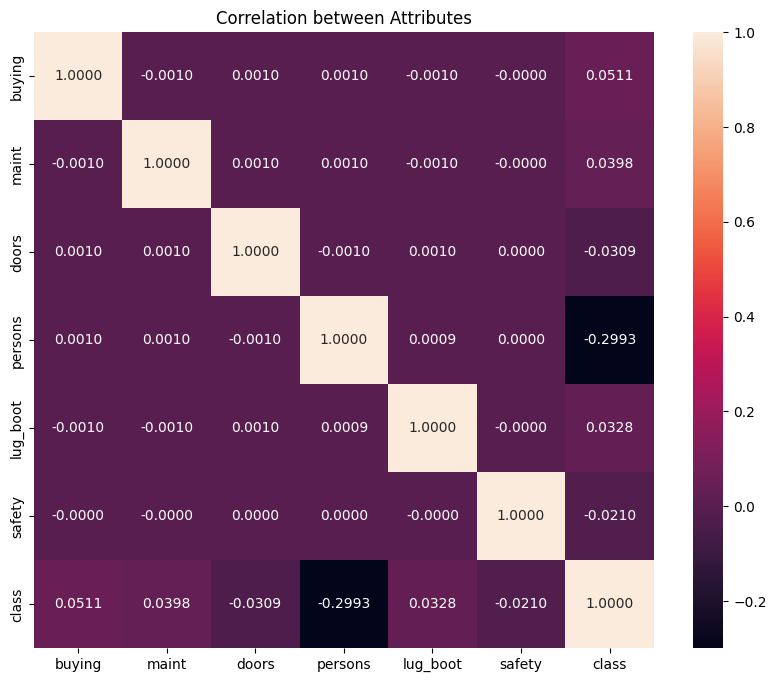

In [95]:
df_correlations = pd.concat([df_features_encoded,df_label_encoded],axis=1).corr()
plt.figure(figsize=(10,8))
df_correlations_Plot = sns.heatmap(df_correlations,annot=True,fmt='.4f')
plt.title("Correlation between Attributes")
plt.show()

### Tranformation Pipelines
- In this tranformation pipeline we are giving two estimators, which will be applied on our dataset. First one is Encoder and second one is Scaler. These two will encode and scale the data.

In [96]:
full_pipeline = Pipeline([
    ('encoder',OrdinalEncoder()),
    ('scaler',StandardScaler())
])
df_features_prepared = full_pipeline.fit_transform(df_features)
df_label_prepared = full_pipeline.fit_transform(df_label)

df_features_prepared = pd.DataFrame(df_features_prepared,columns=df_features.columns)
df_label_prepared = pd.DataFrame(df_label_prepared,columns=df_label.columns)

### Splitting Features and Label into Train test split
- Train test split we are passing two argument first is X variable as (df_features_prepared) and second is (df_label_encoded) the reason we are not using df_label_prepared is while building machine learning model, labels are unlikely to be normalized for that reason we are using only encoded label without stndardization.

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df_features_prepared,df_label_encoded,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
print(y_train.nunique(),y_train.value_counts())

(1381, 6) (346, 6)
(1381, 1) (346, 1)
class    4
dtype: int64 class
2.0      972
0.0      307
1.0       54
3.0       48
dtype: int64


## Model Building & Evaluation
- For model building due to low number of instances (small dataset), we could be faced problem of low accurate model.

### Model Building

In [104]:
logistic_clf = LogisticRegression() # Approx Accuracy: 69.50%
random_forest_clf = RandomForestClassifier() # Approx Accuracy: 96.66%, Approved for model building

### Logistic Reg. Cross Validation Scoring

In [115]:
logisctic_clf_scoring = cross_val_score(logistic_clf,X_train,y_train,cv=5,scoring='accuracy')
random_forest_clf_scoring = cross_val_score(random_forest_clf,X_train,y_train,scoring='accuracy')
print(logisctic_clf_scoring.mean()) # We are getting 69% Accuracy on logistic regression model.
print(random_forest_clf_scoring.mean())

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

0.6908046879087533
0.9681342541725527


### Logistic Reg. Confusion matrix

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

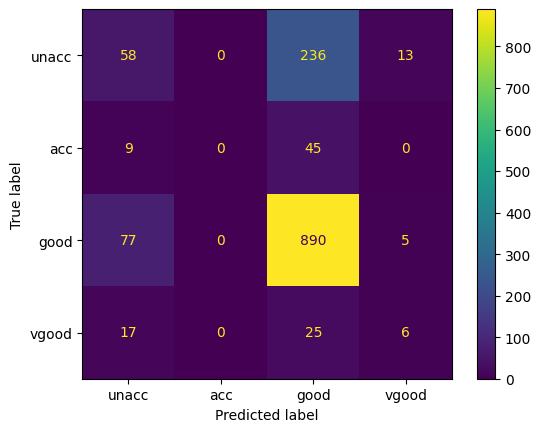

In [100]:
y_train_pred = cross_val_predict(logistic_clf,X_train,y_train,cv=5)
confusion_mat = confusion_matrix(y_train,y_train_pred)
confusion_mat_plot = ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=['unacc','acc','good','vgood'])
confusion_mat_plot.plot()
plt.show()

### Logistic Reg. Precision and Recall

In [101]:
logisctic_clf_precision = precision_score(y_train,y_train_pred,average='micro')
logistic_clf_recall = recall_score(y_train,y_train_pred,average='micro')
logistic_clf_f1_score = f1_score(y_train,y_train_pred,average='micro')
print(logisctic_clf_precision) # Precision score: 69.57
print(logistic_clf_recall) # Recall score: 69.57
print(logistic_clf_f1_score) # F1 score: 69.57

0.6908037653874004
0.6908037653874004
0.6908037653874004


### Random Forest Confusion Matrix

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:1050: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:1050: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:1050: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Dhru

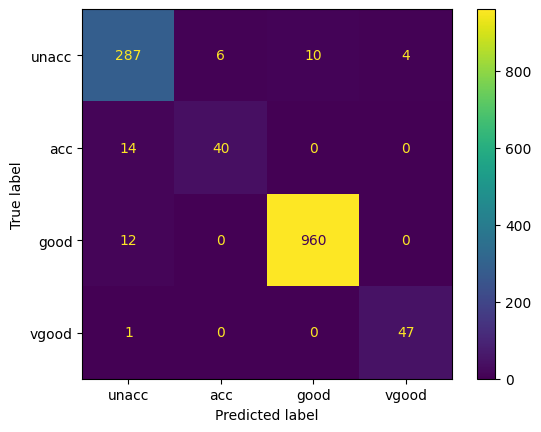

In [102]:
y_train_pred_forest_clf = cross_val_predict(random_forest_clf,X_train,y_train,cv=5)
confusion_mat = confusion_matrix(y_train,y_train_pred_forest_clf)
confusion_mat_plot = ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=['unacc','acc','good','vgood'])
confusion_mat_plot.plot()
plt.show()

### Random Forest Precision and Recall

In [103]:
random_forest_clf_precision = precision_score(y_train,y_train_pred_forest_clf,average='micro')
random_forest_clf_recall = recall_score(y_train,y_train_pred_forest_clf,average='micro')
random_forest_clf_f1_score = f1_score(y_train,y_train_pred_forest_clf,average='micro')
print(random_forest_clf_precision) # Precision score: 96.66
print(random_forest_clf_recall) # Recall score: 96.59
print(random_forest_clf_f1_score) # F1 score: 96.59

0.9659666908037654
0.9659666908037654
0.9659666908037654


### Fitting Randome Forest on Train set

C:\Users\Dhrumil Patel\AppData\Local\Temp\ipykernel_13416\3632113473.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_clf.fit(X_train,y_train)


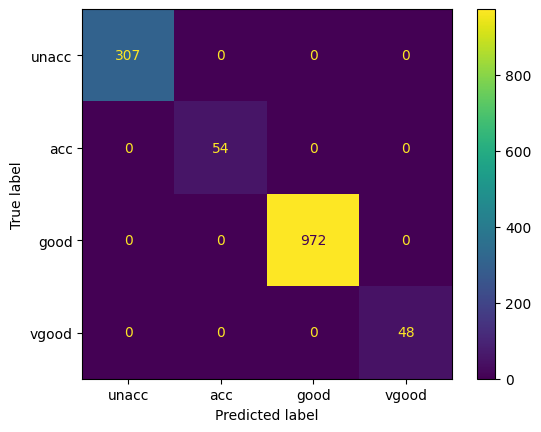

1.0
1.0
1.0


In [113]:
# random_forest_clf = RandomForestClassifier() Already assigned in above cell.
random_forest_clf.fit(X_train,y_train)
y_train_pred_forest_clf = random_forest_clf.predict(X_train)

# Again checking for confustion matrix after fitting it on my train set
confusion_mat = confusion_matrix(y_true=y_train,y_pred=y_train_pred_forest_clf)
confusion_mat_plot = ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=['unacc','acc','good','vgood'])
confusion_mat_plot.plot()
plt.show()

# Checking for Precision Recall and F1 score
random_forest_clf_precision = precision_score(y_train,y_train_pred_forest_clf,average='micro')
random_forest_clf_recall = recall_score(y_train,y_train_pred_forest_clf,average='micro')
random_forest_clf_f1_score = f1_score(y_train,y_train_pred_forest_clf,average='micro')
print(random_forest_clf_precision) # Precision score: 100%
print(random_forest_clf_recall) # Recall score: 100%
print(random_forest_clf_f1_score) # F1 score: 100%

### Random Forest Learning Curve
- Learning curve we are using to check whether our model has overfitter or underfitted or perfectly fitted on our training dataset.
- Below graph states that, while training our Random forest model on training set it has fitted perfectly, while fitting that same model on validation set it gradually matching the accuracy of train set. In short model has not overfitted.

C:\Users\Dhrumil Patel\AppData\Local\Temp\ipykernel_13416\3543441720.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train[:m],y_train[:m])
C:\Users\Dhrumil Patel\AppData\Local\Temp\ipykernel_13416\3543441720.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train[:m],y_train[:m])
C:\Users\Dhrumil Patel\AppData\Local\Temp\ipykernel_13416\3543441720.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train[:m],y_train[:m])
C:\Users\Dhrumil Patel\AppData\Local\Temp\ipykernel_13416\3543441720.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

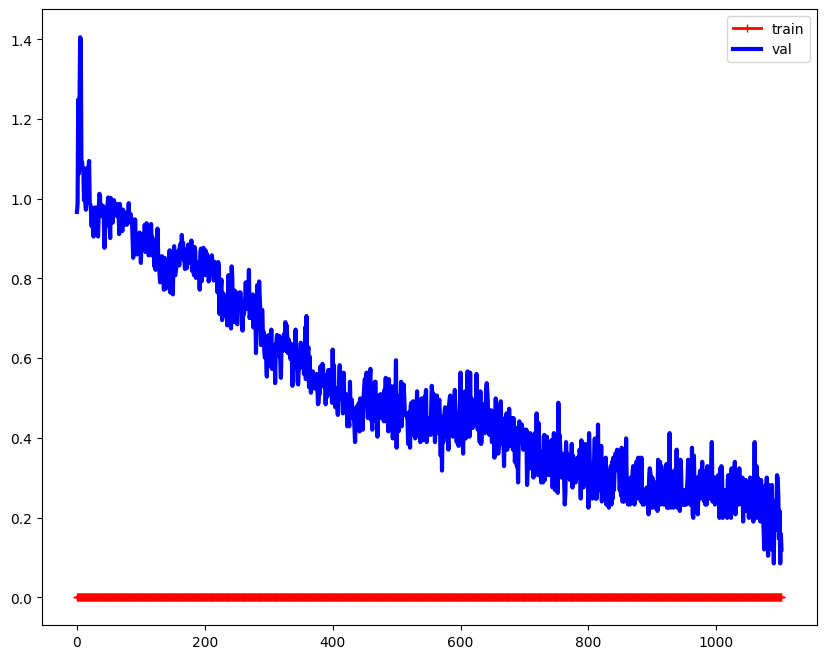

In [120]:
def plot_learning_curve(estimator, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [],[]

    for m in range(1,len(X_train)):
        estimator.fit(X_train[:m],y_train[:m])
        y_train_predict = estimator.predict(X_train[:m])
        y_val_predict = estimator.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))

    plt.figure(figsize=(10,8))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val')
    plt.legend()
    plt.show()
# Usage
plot_learning_curve(random_forest_clf, X_train, y_train)


### Fine Tuning Random Forest Model
- Using Grid Search CV with Param Grid of Random forest classifier.

In [126]:
param_grid = param_grid = [
    {
    'n_estimators': [10,20,30,50, 100, 200],
    'max_features': [2,4,3]
    },
    {
        'bootstrap': [True, False],
        'n_estimators': [5,15,25,35,55,75]

    }]
random_forest_grid_search = GridSearchCV(random_forest_clf,param_grid=param_grid,cv=3,scoring='accuracy')
random_forest_grid_search.fit(X_train,y_train)
print(random_forest_grid_search.best_params_) # Getting best parameter combination
print(random_forest_grid_search.best_score_) # Getting best score 
print(random_forest_grid_search.best_estimator_) # Getting best estimator

# Evaluating Grid Scores
cvres = random_forest_grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(mean_score,params)

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Dhrumil

{'max_features': 4, 'n_estimators': 50}
0.9724842025841743
RandomForestClassifier(max_features=4, n_estimators=50)
0.9254141909522463 {'max_features': 2, 'n_estimators': 10}
0.9420698544437109 {'max_features': 2, 'n_estimators': 20}
0.9406205790813921 {'max_features': 2, 'n_estimators': 30}
0.9551086170580653 {'max_features': 2, 'n_estimators': 50}
0.9652504008299538 {'max_features': 2, 'n_estimators': 100}
0.9601779370618378 {'max_features': 2, 'n_estimators': 200}
0.9645147599735924 {'max_features': 4, 'n_estimators': 10}
0.964516331855764 {'max_features': 4, 'n_estimators': 20}
0.9666902448992424 {'max_features': 4, 'n_estimators': 30}
0.9724842025841743 {'max_features': 4, 'n_estimators': 50}
0.9681379483793896 {'max_features': 4, 'n_estimators': 100}
0.9695872237417084 {'max_features': 4, 'n_estimators': 200}
0.9565516048916973 {'max_features': 3, 'n_estimators': 10}
0.9616209248954698 {'max_features': 3, 'n_estimators': 20}
0.9652393976547518 {'max_features': 3, 'n_estimators': 3

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


### Fitting Randome Forest on Test set

In [134]:
final_model = random_forest_grid_search.best_estimator_
y_test_final_pred = final_model.predict(X_test) # Fitting model on Test set.clear
acc_score =accuracy_score(y_true=y_test,y_pred=y_test_final_pred)
print('Final Accuracy on Random Forest Classifier:', acc_score)

Final Accuracy on Random Forest Classifier: 0.9710982658959537


### `Note:` Machine learning end to end project has done for car evaluation for more projects visit: www.github.com/itechdp